
 **EDA CASE STUDY  - DATA ANALYSIS**                                                                         
 This is a group case study                                                                              
                                                                                                         
 Members:                                                                                                
 1. Bhanu Pratap                                                                                        
 2. Shadab Hussain                                                                                   
 3. Nidhi Tripathi                                                                                      
 4. Vikash Bajaj 
 <br>                                                                                                      
 Brief on subject:                                                                                        
 The consumer finance company specializes in different types of loans to the urban customer.             
 The major problem they face is when the customer fails to replay the loan .                             
                                                                                                         
 Business objective:                                                                                     
 The aim of this analysis is to find the trend of borrowers who are likely to default and non-default                                                                                       
                                                                                                         
 Input files used:                                                                                       
                                                                                                         
 **Loan.csv**  - Provides details of past loan applicants and whether are defaulters or not.                      

# Gramener Case Default Analysis

The analysis is divided into four main parts:
1. Data  Loading and Understanding 
2. Data cleaning (cleaning missing (NA) values, removing redundant columns etc.)
3. Data Analysis 
4. Univariate Analysis
5. Segmented Univariate Analysis
6. Conclusion

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Data Loading and Understanding

In [2]:
# importing the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
% matplotlib inline



UsageError: Line magic function `%` not found.


In [3]:
# loading the loan dataset
loan_df = pd.read_csv("loan.csv", parse_dates= ['issue_d'], low_memory=False)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# let's print first few rows of the loan_df
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# printing all the column names
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

There are total 111 columns some of the important columns in the dataset are loan_amount, annual income, term, interest rate, grade, sub grade, purpose, verification_status of the loan etc.

The **Column of intrest**, is **loan status**. The strategy is to figure out the average default rates across various independent variables and identify the  ones that affect the default rate more than others.


# Data Cleaning

1. Find out which all columns are having null/NaN values, find all these columns and drop them as they dont give any insight.
2. Drop the columns which are not relevent or not present at time of application submission.

In [6]:
# checking the number of missing values in each column
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# Checking the percentage of missing values in each column
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


There many columns have 100% missing values, and some have 65%, 33% etc. First, let's drop all the columns having 100% missing values as they are not of any use to us.

In [8]:
# Dropping the columns having more than 90% missing values
columns_90 = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 90]
print(columns_90)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
# Dropping the columns which has more than 90% null values.
loan_df = loan_df.drop(columns_90, axis=1)
print(loan_df.shape)

(39717, 55)


In [10]:
# Checking the percentage of missing values in each column
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [11]:
# There are now 2 columns having  33 and 65% missing values - 
# description and months since last delinquent

# let's drop these columns as they are not very useful to our analysis
loan_df = loan_df.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [12]:
# Checking the cloumns whcih are having null valuse more than 7%
len(loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 7])


0

There are still some columns whcih has null values, but the percentage of null valuse are less than 7%. So for now we are going to ignore those columns. If in future analysis, these columns create some problem, then we will take care of those columns then and there.

In [13]:
# Lets see if we have more than 5 null valuse in a row.
len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)

0

There are no rows which are having more than 5 null values.

In [14]:
loan_df.duplicated().sum()

0

There are no duplicated rows in the dataset.

In [15]:
# lets print the column name and data type
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [16]:
# Printing the first few values of int_rate columns
loan_df['int_rate'].head(5)

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [17]:
# The column int_rate is character type and having % symbol with the numeric value, 
#let's convert it to float and remove the % sign
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [18]:
# Printing the first few values of int_rate column to see if column data is in correct format
loan_df['int_rate'].head(5)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [19]:
# printing the first few values form emp_length column
loan_df['emp_length'].head(5)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [20]:
# extracting  the numeric part from the variable employment length

# dropping the missing values from the  emp_length column
loan_df = loan_df[~loan_df['emp_length'].isnull()]

loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [21]:
# printing the first few values form emp_length column to see if column data is in correct format
loan_df['emp_length'].head(5)

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

## Data Analysis

Let's move to data analysis segment. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis and which are not useful. 

The objective of this case study is to identify best predictors of default so that at the time of loan application, we can use those predictors (variables) for approval/rejection of the loan. Now, there are broadly followings types of variables - 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) 
3. those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.These are called customer behaviour variables. 

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the other two types of variables.



In [22]:
behaviour_variables =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "total_pymnt",
  "total_pymnt_inv",
   "out_prncp",
  "out_prncp_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_variables

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [23]:
# let's now remove the behaviour variables from loan_df and create a new df
df = loan_df.drop(behaviour_variables, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [24]:
# the variables like  zip code, address, state, 'title' are not useful in predicting the loan status.
# So dropping these variables.

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [25]:
# As in loan status there are onlt three unique values 'Fully Paid', 'Charged Off', and 'Current'.
# Lets convert this column to 'category' data type. 
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

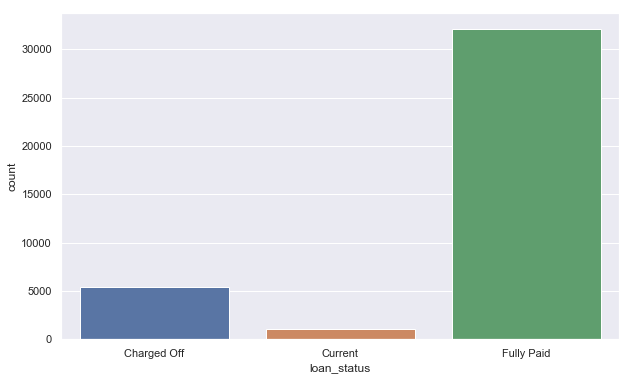

In [26]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.countplot(x=df['loan_status'], data=df);

For most of the loan the status is fully Paid. The loan with status  'current' are neither fully paid not defaulted, these application will not gives us any results so get rid of the current loans.let's convert  the other two values as 0 or 1. 

In [27]:
# Removing the current loans from the dataframe.
df = df[df['loan_status'] != 'Current']

# Change the loan status to 0 if it is fully paid and to 1 if it is charged off
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

Next, let's start with univariate analysis.

## Univariate Analysis

First, let's look at the overall default rate.


In [28]:
# default rate for whole dataset
round(np.mean(df['loan_status']), 2)

0.14

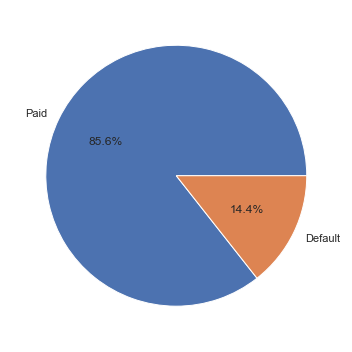

In [29]:
# creating a pie chart for better visual of total number of application for each status.
paid = len(df[df['loan_status'] == 0])
default =  len(df[df['loan_status'] == 1])
plt.figure(figsize=(10,6))
plt.pie([paid, default] ,labels = ['Paid', 'Default'], autopct='%1.1f%%');

The overall **default rate** is approx. **14%**.  


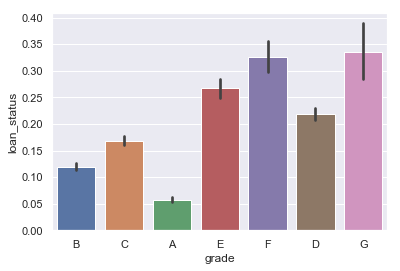

In [30]:
# plotting default rates against grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show();

#### Default rate is increasing with the grades A to G.<br>

Lets calculate the above average default rates in numbers

In [31]:
#Default rate variation across grades of loans
default_rates = df.groupby('grade').loan_status.mean().sort_values()
default_rates

grade
A    0.057764
B    0.119289
C    0.167949
D    0.217915
E    0.267176
F    0.326382
G    0.335570
Name: loan_status, dtype: float64

Lets calculate the difference between the highest and the lowest default rate across the different grades of loan .This will show us how much grades are effecting the default rates.

In [32]:
#calulating the difference between highest and lowest default rates 
difference = (round(default_rates.max() - default_rates.min(), 2))*100
difference

28.000000000000004

#### There is 28% increase in the default rates as we go from grade A to grade G of the loan.

We have check the behaviour of loan status as above with all other variables. It would be better if we create a function for the above code as we have to repeate this process again and again.

In [33]:
# lets create a function to plot loan_status across other variables
def plot(var):
    sns.barplot(x=var, y='loan_status', data=df)
    plt.show()
    

In [34]:
# creating the function for calculating the average default rates acorss various categories of the variable.
# It will also create the difference between the highest and the lowest default rate across categories of variable.
def avg_def_rate(var):
    default_rates = df.groupby(var).loan_status.mean().sort_values()
    print(default_rates)
    difference = (round(default_rates.max() - default_rates.min(), 2))*100
    print("Difference between highest and lowest average default rates for {} is :{}".format(var,difference))
    

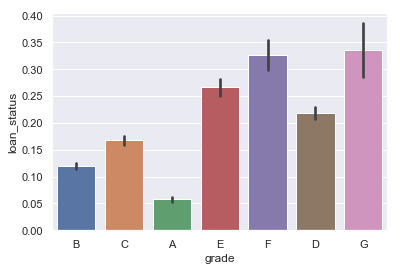

In [35]:
# Lets see if function is working and plotting the same graph as before for comparision.
plot('grade')

In [36]:
#Checking if the function is working or not.
avg_def_rate('grade')

grade
A    0.057764
B    0.119289
C    0.167949
D    0.217915
E    0.267176
F    0.326382
G    0.335570
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for grade is :28.000000000000004


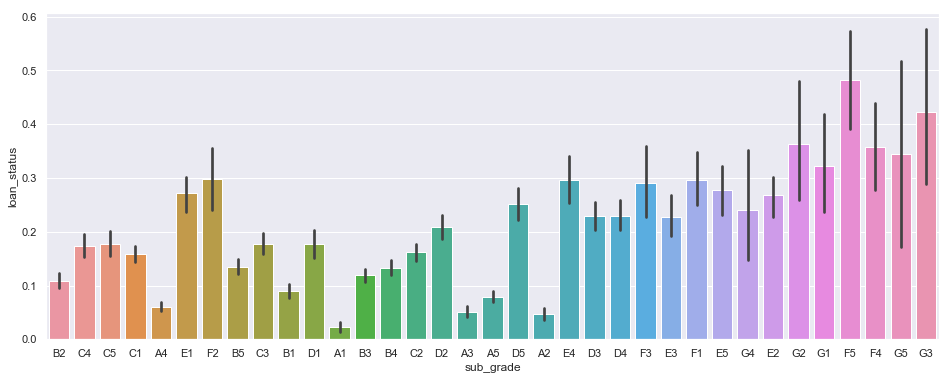

In [37]:
# Plotting the loan status against sub grade of the loan
plt.figure(figsize=(16, 6))
plot('sub_grade')

#### Default rate for A1 is less than A2 and for A2 it is less than A3 and so on 

In [38]:
#Default rate variation across sub_grades of loans and calulating the difference between highest and lowest default rates 
avg_def_rate('sub_grade')

sub_grade
A1    0.022814
A2    0.047189
A3    0.051694
A4    0.060172
A5    0.078967
B1    0.089431
B2    0.108539
B3    0.118718
B4    0.133166
B5    0.135209
C1    0.158888
C2    0.161664
C4    0.172619
C5    0.177362
C3    0.177641
D1    0.177948
D2    0.207968
E3    0.228175
D3    0.228440
D4    0.229834
G4    0.240741
D5    0.250923
E2    0.267769
E1    0.271449
E5    0.278215
F3    0.290698
F1    0.295681
E4    0.295943
F2    0.298246
G1    0.322581
G5    0.344828
F4    0.358108
G2    0.363636
G3    0.422222
F5    0.481818
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for sub_grade is :46.0


#### There is 46% increase in the default rates as we go from grade A1 to grade G5 of the loan. Loan_subgrae is a good predictor for defaulters.

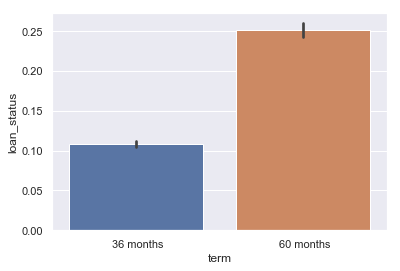

In [39]:
# Plotting the loan status against 'term' of the loan
plot('term')

#### 60 months term has more default reate than 36 month.

In [40]:
#Default rate variation across term of loans and calulating the difference between highest and lowest default rates 
avg_def_rate('term')

term
 36 months    0.108636
 60 months    0.251269
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for term is :14.000000000000002


#### There is 14% increase in the default rates as we go from 36month term to 60month term. Term is a good predictor for defaulters.

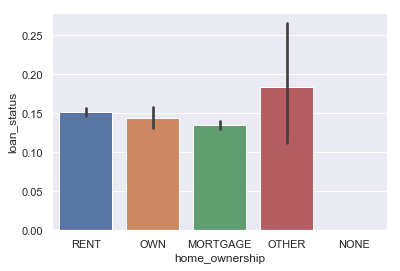

In [41]:
# Plotting the loan status against 'home ownership' of the loan
plot('home_ownership')

#### There is not much difference in default rate for different Home Ownerships . Home Ownership is not a good predictor for defaulters.

In [42]:
#Default rate variation across 'home ownership' of loans and calulating the difference between highest and lowest default rates 
avg_def_rate('home_ownership')

home_ownership
NONE        0.000000
MORTGAGE    0.135282
OWN         0.144404
RENT        0.151344
OTHER       0.183673
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for home_ownership is :18.0


#### The average default rate for 'None' category is 0. That is why above difference is 18.0, but the actual difference is 4.8% among other categories of  'home ownership'. This is not a good predictor of defaulters.

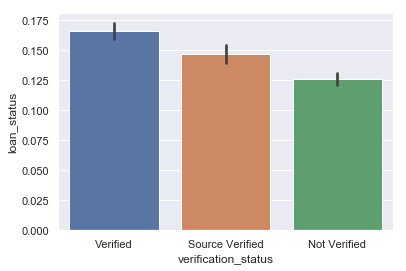

In [43]:
# Plotting the loan status against 'verification status' of the loan
plot('verification_status')

#### Verified loans has more default rate than non verified ones. This is counter intuative, so this is also not a good predictor for defaulters.

In [44]:
#Default rate variation across 'verification_status' of loans and calulating the difference between highest and lowest default rates 
avg_def_rate('verification_status')

verification_status
Not Verified       0.125875
Source Verified    0.147040
Verified           0.165987
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for verification_status is :4.0


#### There is only 4% increase in the default rates as we go across different categories of verification_status. So this is not a good predictor for defaulters.

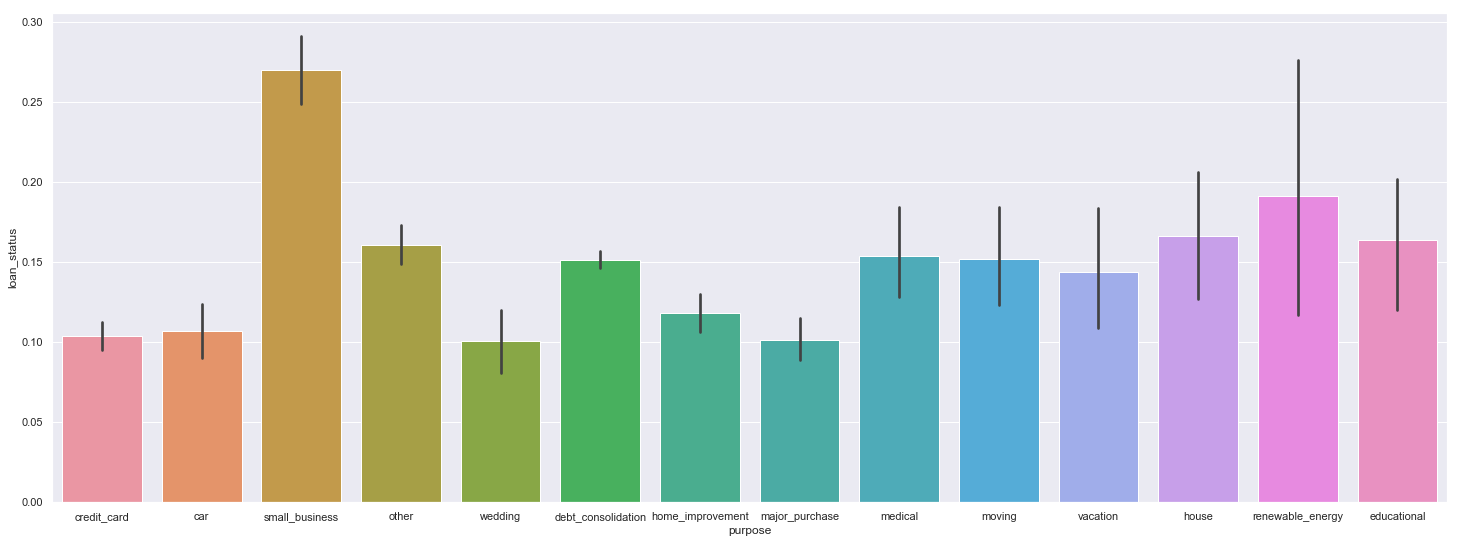

In [45]:
# Plotting the loan status against 'purpose' of the loan
plt.figure(figsize=(25, 9))
plot('purpose')

#### The top 5 purpose of loan with most default rate are following:
1. Small Business
2. Renewable Energy
3. Education
4. House
5. other

In [46]:
#Default rate variation across 'purpose' of loans and calulating the difference between highest and lowest default rates 
avg_def_rate('purpose')

purpose
wedding               0.100767
major_purchase        0.101442
credit_card           0.104103
car                   0.107044
home_improvement      0.118492
vacation              0.143678
debt_consolidation    0.151570
moving                0.152174
medical               0.153963
other                 0.160517
educational           0.164038
house                 0.166667
renewable_energy      0.191489
small_business        0.270175
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for purpose is :17.0


#### There is 17% increase in the default rates as we go across different categories of purpose. So this is a good predictor for defaulters.

In [47]:
#lets print  the first few rows for issue date.
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [48]:
# Converting the issue_d to standard date time format so that we can extract the year and month form that.
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [49]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [50]:
# let's print the number of application per year
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

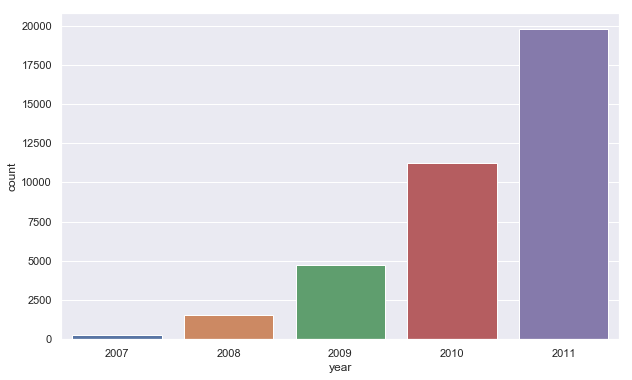

In [51]:
# lets print the count plot of the number of application per year
plt.figure(figsize=(10,6))
sns.countplot(x=df['year'], data=df);

#### From the above graph we can see that number of loans has increased steadily across years.

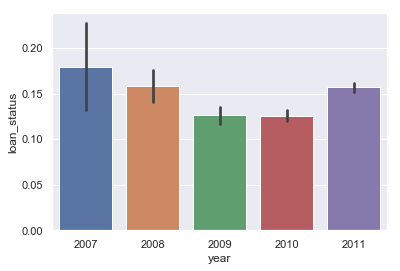

In [52]:
# Plotting the loan status against 'year' in which  the loan issued
plot('year')

#### The default rate decreased from 2007 to 2010 and then increased again in 2011.

In [53]:
#Default rate variation across 'year' of loans in which  the loan issued and calulating the difference between highest and lowest default rates 
avg_def_rate('year')

year
2010    0.125825
2009    0.125954
2011    0.156659
2008    0.158131
2007    0.179283
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for year is :5.0


#### There is only 5% difference in the lowest and highest  average default rates across the years. Year is not a good predictor for defaulters. 

In [54]:
# let's print the number of application per month 
df.groupby('month').year.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: year, dtype: int64

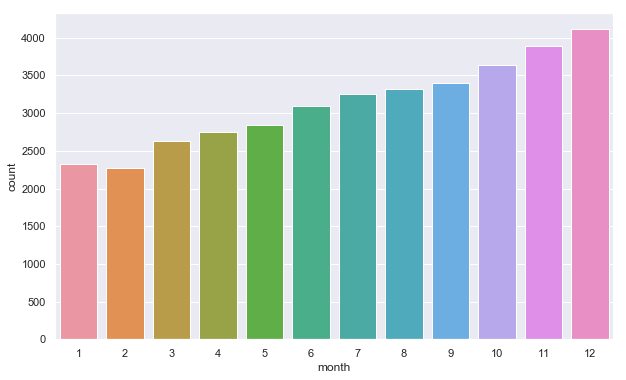

In [55]:
# lets print the count plot of the number of application per year
plt.figure(figsize=(10,6))
sns.countplot(x=df['month'], data=df);

#### The most number of loan issued in December and in total the last six month of the year.

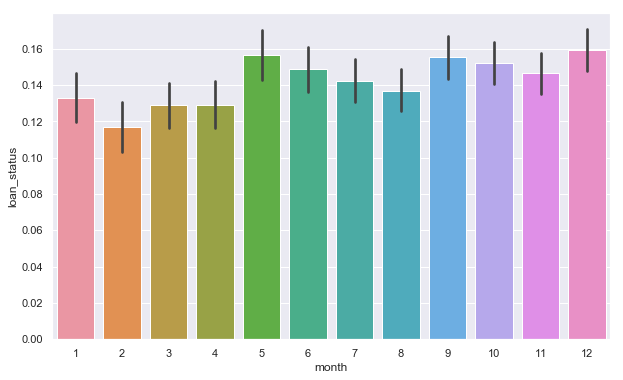

In [56]:
# Plotting the loan status against 'month' in which  the loan issued
plt.figure(figsize=(10,6))
plot('month')

#### There is not a trend in default rate with the month. For all the months the default rate is similar. 
#### Month is not a good predictor for the defaulters.

In [57]:
#Default rate variation across'month'of loans in which  the loan issued and calulating the difference between highest and lowest default rates 
avg_def_rate('month')

month
2     0.116769
3     0.128799
4     0.129173
1     0.132990
8     0.137007
7     0.142023
11    0.146530
6     0.148675
10    0.152323
9     0.155274
5     0.156448
12    0.159223
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for month is :4.0


#### There is only 5% difference in the lowest and highest average default rates across the months. Month is not a good predictor for defaulters

In [58]:
df['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

It would be easier to plot the default rate against the loan_amnt if we convert the loan_amnt to discrete categories (Bins)

In [59]:
# Converting the loan amount to the discrete categories(Bins)
def loan_amnt_bin(n):
    if n < 5500:
        return 'low'
    elif n >=5500 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amnt_bin(x))

In [60]:
# Printing the number of application in each categories.
df['loan_amnt'].value_counts()

medium       17901
low           9351
high          7572
very high     2720
Name: loan_amnt, dtype: int64

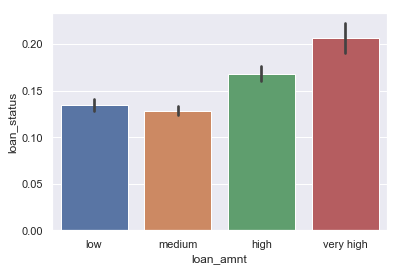

In [61]:
# Plotting the loan status against 'loan_amnt' of the loan
plot('loan_amnt')

#### It is clear from the above graph , application with higher loan_amnt has higher default rate.

In [62]:
#Default rate variation across'loan_amnt'of loans
#and calulating the difference between highest and lowest default rates 
avg_def_rate('loan_amnt')

loan_amnt
medium       0.128596
low          0.134745
high         0.168251
very high    0.206985
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for loan_amnt is :8.0


#### There is 8% difference in the lowest and highest average default rates across the different categories of loan_amnt. loan_amnt can be a predictor for defaulters.

In [63]:
df['funded_amnt_inv'].describe()

count    37544.000000
mean     10280.495739
std       7034.124211
min          0.000000
25%       5000.000000
50%       8850.000000
75%      14075.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [64]:
# Converting the funded_amnt_inv to the discrete categories(Bins)
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amnt_bin(x))

In [65]:
# Printing the number of application in each categories.
df['funded_amnt_inv'].value_counts()

medium       18790
low          10760
high          6658
very high     1336
Name: funded_amnt_inv, dtype: int64

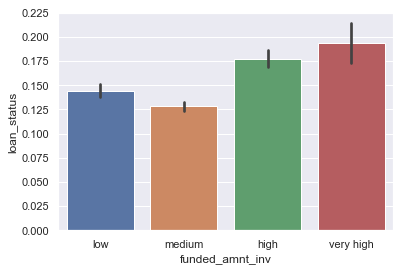

In [66]:
# Plotting the loan status against 'funded_amnt_inv' of the loan
plot('funded_amnt_inv')

#### It is clear from the above graph , application with higher funded_amnt_inv has higher default rate.

In [67]:
#Default rate variation across'funded_amnt_inv'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('funded_amnt_inv')

funded_amnt_inv
medium       0.128153
low          0.144238
high         0.177230
very high    0.193862
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for funded_amnt_inv is :7.000000000000001


#### There is 7% difference in the lowest and highest average default rates across the different categories of funded_amnt_inv. funded_amnt_inv can be a predictor for defaulters.

In [68]:
df['dti'].describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

In [69]:
# Converting the dti to the discrete categories(Bins)
def dti_bin(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti_bin(x))

In [70]:
# Printing the number of application in each categories.
df['dti'].value_counts()

medium    18002
low       12545
high       6997
Name: dti, dtype: int64

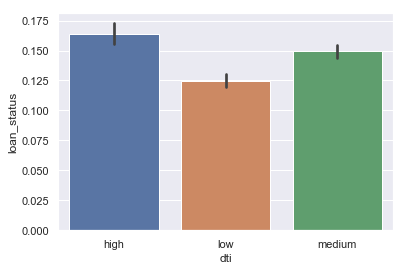

In [71]:
# Plotting the loan status against 'dti' of the loan
plot('dti')

#### Higher the 'dti', Higher the default rates

In [72]:
#Default rate variation across'dti'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('dti')

dti
low       0.124910
medium    0.149261
high      0.163642
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for dti is :4.0


#### There is only 4% difference in the lowest and highest average default rates across the different categories of dti. dti is not a good predictor for defaulters.

In [73]:
df['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [74]:
# Converting the int_rate to the discrete categories(Bins)
def int_rate_bin(n):
    if n < 10:
        return 'low'
    elif n >= 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate_bin(x))

In [75]:
# Printing the number of application in each categories.
df['int_rate'].value_counts()

medium    18123
low       11591
high       7830
Name: int_rate, dtype: int64

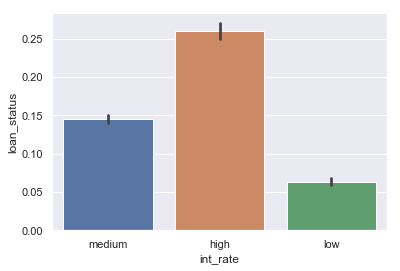

In [76]:
# Plotting the loan status against 'int_rate' of the loan
plot('int_rate')

#### As expected, higher the intrest rate higher the defaulter rates.

In [77]:
#Default rate variation across'int_rate'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('int_rate')

int_rate
low       0.063411
medium    0.145064
high      0.259898
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for int_rate is :20.0


#### There is 20% difference in the lowest and highest average default rates across the different categories of int_rate. int_rate is  a good predictor for defaulters.

In [78]:
df['funded_amnt'].describe()

count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [79]:
# Converting the funded_amnt to the discrete categories(Bins)
def funded_amount_bin(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount_bin(x))

In [80]:
# Printing the number of application in each categories.
df['funded_amnt'].value_counts()

medium    20377
low        9136
high       8031
Name: funded_amnt, dtype: int64

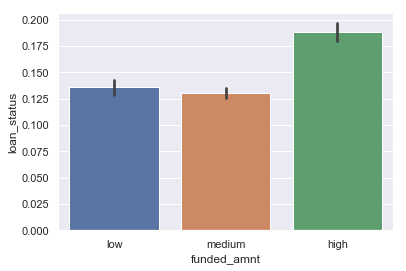

In [81]:
# Plotting the loan status against 'funded_amnt' of the loan
plot('funded_amnt')

#### It is clear from the above graph , application with higher funded_amnt has higher default rate.

In [82]:
#Default rate variation across'funded_amnt'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('funded_amnt')

funded_amnt
medium    0.130098
low       0.135508
high      0.188021
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for funded_amnt is :6.0


#### There is 6% difference in the lowest and highest average default rates across the different categories of funded_amnt. funded_amnt can be a predictor for defaulters.

In [83]:
df['installment'].describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

In [84]:
# Converting the installment to the discrete categories(Bins)
def installment_bin(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment_bin(x))

In [85]:
# Printing the number of application in each categories.
df['installment'].value_counts()

medium       14390
low          12544
high          6458
very high     4152
Name: installment, dtype: int64

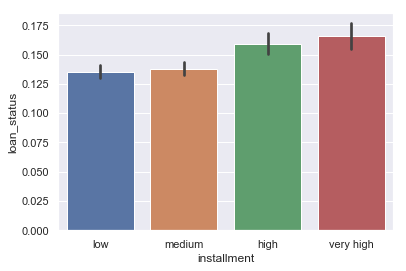

In [86]:
# Plotting the loan status against 'installment' of the loan
plot('installment')

#### It is clear from the above graph , application with higher installment has higher default rate.

In [87]:
#Default rate variation across'installment'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('installment')

installment
low          0.135523
medium       0.138013
high         0.158718
very high    0.165703
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for installment is :3.0


#### There is only 3% difference in the lowest and highest average default rates across the different categories of installment. installment is not a good predictor for defaulters.

In [88]:
df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [89]:
# Converting the annual_inc to the discrete categories(Bins)
def annual_income_bin(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income_bin(x))

In [90]:
# Printing the number of application in each categories.
df['annual_inc'].value_counts()

medium       17433
low          14678
high          3963
very high     1470
Name: annual_inc, dtype: int64

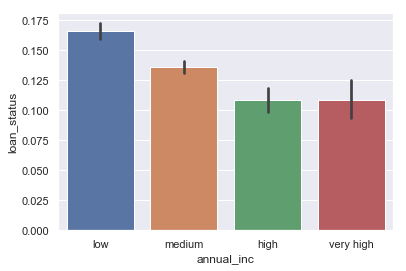

In [91]:
# Plotting the loan status against 'annual_inc' of the loan
plot('annual_inc')

#### As expected, higher the Annual income lower the defaulter rates.

In [92]:
#Default rate variation across'annual_inc'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('annual_inc')

annual_inc
high         0.108251
very high    0.108844
medium       0.136064
low          0.166099
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for annual_inc is :6.0


#### There is 6% difference in the lowest and highest average default rates across the different categories of annual_inc. annual_inc can be a predictor for defaulters.

In [93]:
# removing the null values from the emp_length column
df = df[~df['emp_length'].isnull()]

In [94]:
df['emp_length'].describe()

count    37544.000000
mean         5.061048
std          3.401750
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [95]:
# Converting the emp_length to the discrete categories(Bins)
def emp_length_bin(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length_bin(x))

In [96]:
# Printing the number of application in each categories.
df['emp_length'].value_counts()

expert     11149
senior     10415
junior      8303
fresher     7677
Name: emp_length, dtype: int64

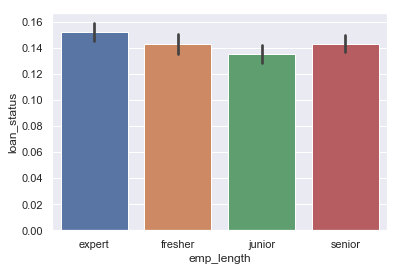

In [97]:
# Plotting the loan status against 'annual_inc' of the loan
plot('emp_length')

#### There is not much difference  in defaulter rates in different emp_lenght bins. This is not a good predictor for defaulters.

In [98]:
#Default rate variation across'emp_length'of loan
#and calulating the difference between highest and lowest default rates 
avg_def_rate('emp_length')

emp_length
junior     0.135132
fresher    0.142634
senior     0.143063
expert     0.151762
Name: loan_status, dtype: float64
Difference between highest and lowest average default rates for emp_length is :2.0


#### There is only  2% difference in the lowest and highest average default rates across the different categories of emp_length. emp_length is not a good predictor for defaulters.

## Segmented Univariate Analysis


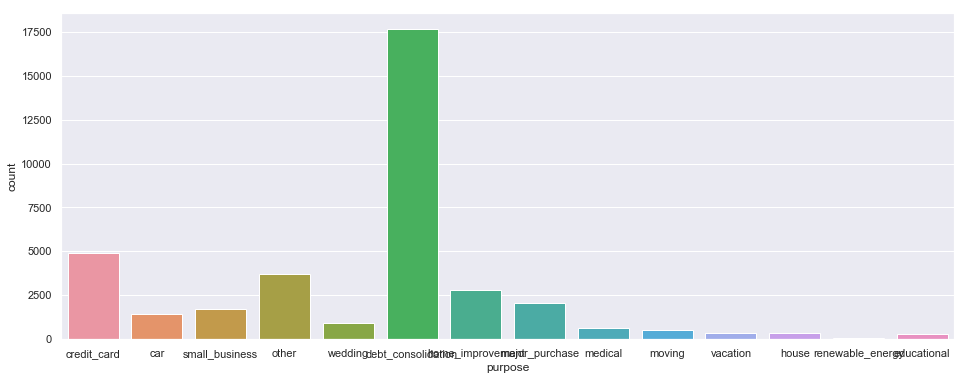

In [99]:
# Print the number of application for each purpose of the loan.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

#### The top 5 purpose of loan with most number of applications are followings:
1. debt_consolidation
2. credit_card
3. other
4. home_improvement
5. major_purchase

#### In the Segmented Univariate Analysis, we will analyse the default rates in the above 5 loans and how defaulters rate changes in these types of loan application with other variables.

In [100]:
# Filtering the dataframe for above 5 type of loans only.
purposes = ['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'major_purchase']
df = df[df['purpose'].isin(purposes)]

In [101]:
#printing the numbr of application in each purpose of loan
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

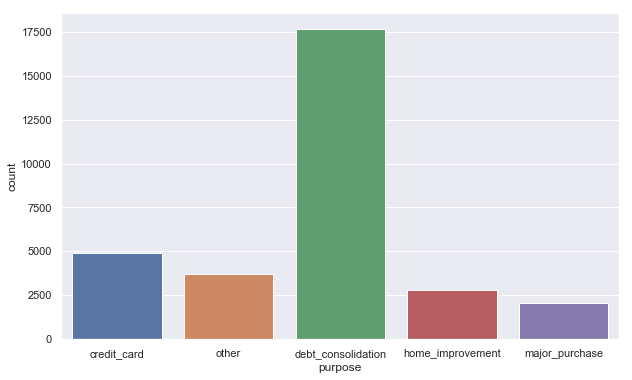

In [102]:
# plotting number of loans by purpose 
plt.figure(figsize=(10, 6))
sns.countplot(x=df['purpose'])
plt.show()

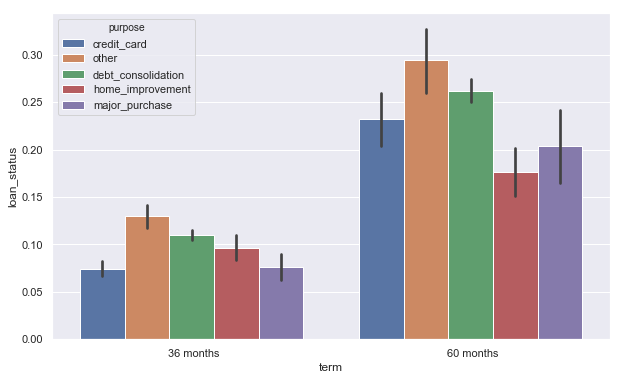

In [103]:
# Plotting the loan status against 'term' of the loan for each type of purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

#### For each purpose '60 month' term has higher default rate than '36 month' term.

In [104]:
#lets create a function as we have to do this analysis for each variables.
def plot_seg(var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=var, y='loan_status', hue='purpose', data=df)
    plt.show()

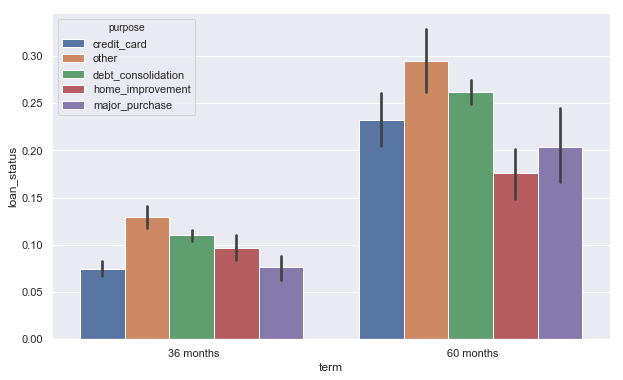

In [105]:
#lets Plotting the loan status against 'term' of the loan for each type of purpose again
plot_seg('term')

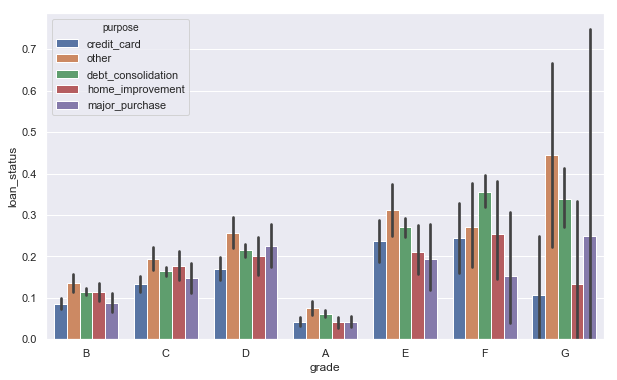

In [106]:
# Plotting the loan status against 'grade' of the loan for each type of purpose
plot_seg('grade')

#### For each purpose as Grade increases from A to G, the default rate also increases.

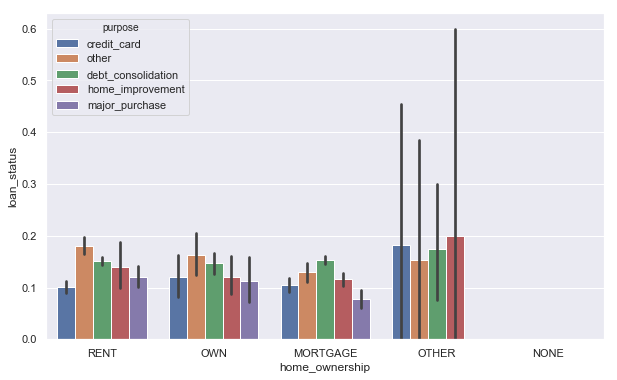

In [107]:
# Plotting the loan status against 'home_ownership' of the loan for each type of purpose
plot_seg('home_ownership')

#### There is not much difference in default rate for different Home Ownerships for each purpose.

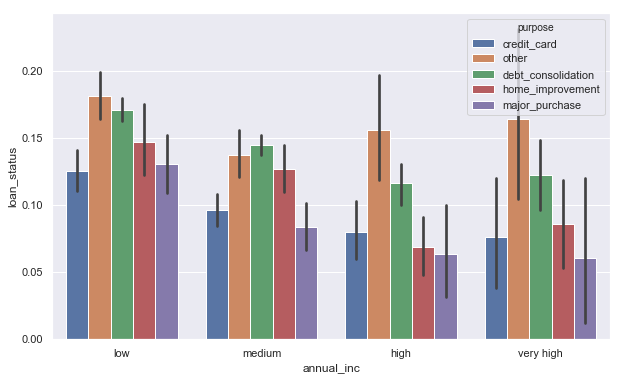

In [108]:
# Plotting the loan status against 'annual_inc' of the loan for each type of purpose
plot_seg('annual_inc')

#### Low annual income has higher default rate in all the purpose.

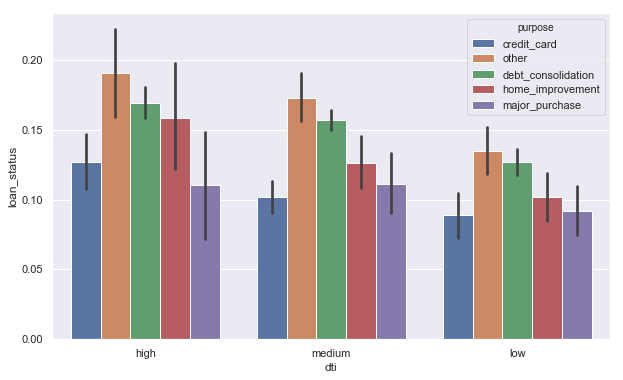

In [109]:
# Plotting the loan status against 'dti' of the loan for each type of purpose
plot_seg('dti')

#### There is not much difference in default rate for different Dti for each purpose.

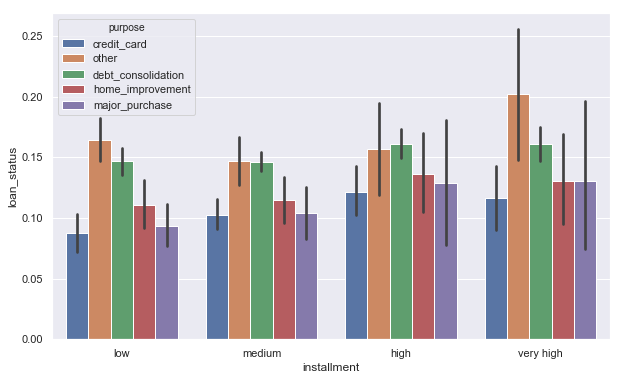

In [110]:
# Plotting the loan status against 'installment' of the loan for each type of purpose
plot_seg('installment')

#### High installment has higher default rates for all the purpose.

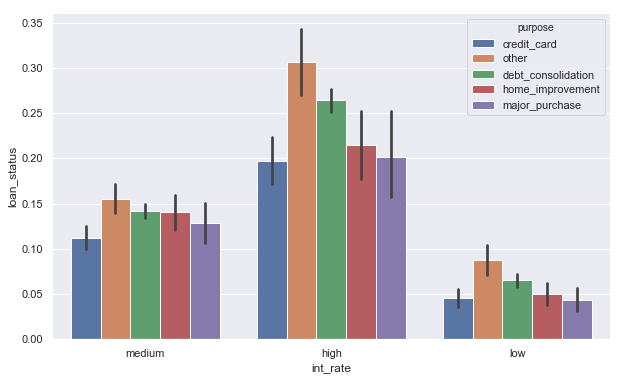

In [111]:
# Plotting the loan status against 'int_rate' of the loan for each type of purpose
plot_seg('int_rate')

#### Higher intrest rate has higher default rate for all the purpose.

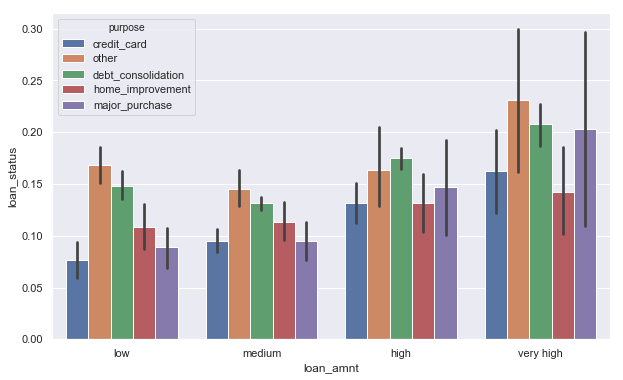

In [112]:
# Plotting the loan status against 'loan_amnt' of the loan for each type of purpose
plot_seg('loan_amnt')

#### Higher loan amount has higher default rate for all the purpose.

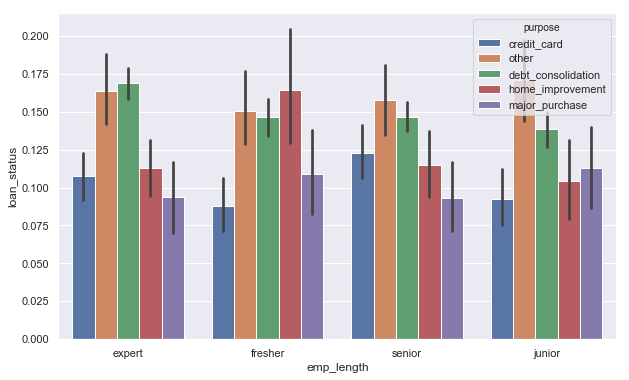

In [113]:
# Plotting the loan status against 'emp_length' of the loan for each type of purpose
plot_seg('emp_length')

#### For all categories of employee length, default rate is almost same . Employee length is not a good predictor for defaulters.

In [114]:
# Creating the function for calculating the increment diff in default rate for a variable
def avg_def_rate1(var):
    default_rates = df.groupby(var).loan_status.mean().sort_values()
    difference = (round(default_rates.max() - default_rates.min(), 2))*100
    print("{}   :{}".format(var,difference))

In [115]:
avg_def_rate1('grade')

grade   :27.0


In [116]:
predictor = ['grade', 'sub_grade', 'term', 'home_ownership', 'verification_status','year','month','loan_amnt', 'funded_amnt_inv'
            , 'dti', 'int_rate' , 'funded_amnt','annual_inc','emp_length', 'installment']

In [117]:
# Printing the increment difference in default rate for each predictor for top 5 purpose
for i in predictor:
    avg_def_rate1(i)
    

grade   :27.0
sub_grade   :46.0
term   :15.0
home_ownership   :16.0
verification_status   :4.0
year   :4.0
month   :4.0
loan_amnt   :7.000000000000001
funded_amnt_inv   :6.0
dti   :5.0
int_rate   :19.0
funded_amnt   :5.0
annual_inc   :6.0
emp_length   :2.0
installment   :2.0


# Conclusion

### The following statement can be made about the dataset on the basis of above analysis:

1. The most number of application are with `debt_consolidation` purpose. This means `debt_consolidation` is the most famous type of loan.
2. The loan with purpose `small_business` has the highest default rate among all other purposes.

### Following are some good predictors for defaulter:
1. Purpose
2. Grade od loan
3. Sub grade of loan
4. Term of loan
5. Loan amount 
6. Intrest rate
7. Loan amount 
8. Funded amount
9. annual income


### Following are some variables which are not a good predictors for defaulter:
1. Year in which loan issued
2. Month in which loan issued
3. Employee Length
4. Home ownership
5. Source income verification status
6. Installment amount